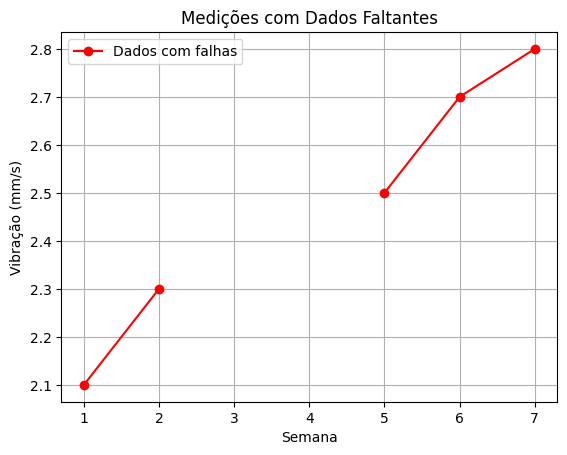

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Simulando dados de vibração (com falha nas semanas 3 e 4)
semanas = np.array([1, 2, 3, 4, 5, 6, 7])
vibracao = np.array([2.1, 2.3, np.nan, np.nan, 2.5, 2.7, 2.8])  # Dados com falhas

# Plotagem dos dados originais (com falhas)
plt.plot(semanas, vibracao, 'o-', label='Dados com falhas', color='red')
plt.xlabel('Semana')
plt.ylabel('Vibração (mm/s)')
plt.title('Medições com Dados Faltantes')
plt.legend()
plt.grid(True)
plt.show()


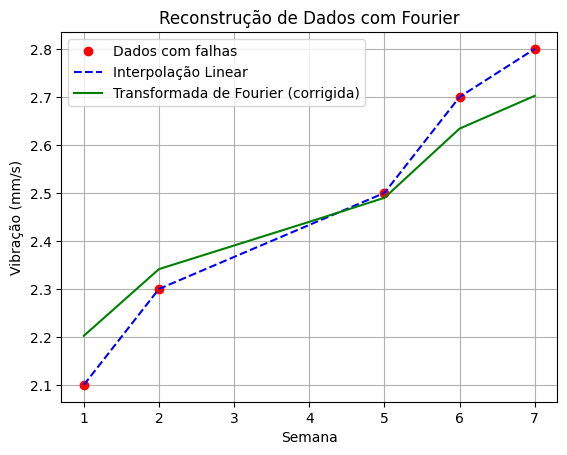

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Simulando os dados (com falha nas semanas 3 e 4)
semanas = np.array([1, 2, 3, 4, 5, 6, 7])
vibracao = np.array([2.1, 2.3, np.nan, np.nan, 2.5, 2.7, 2.8])  # Dados com falhas

# Criando máscara para identificar os pontos faltantes
mask = np.isnan(vibracao)
vibracao_interp = np.copy(vibracao)

# Preenchendo os dados ausentes com interpolação linear inicial
vibracao_interp[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), vibracao[~mask])

# Aplicando a Transformada de Fourier
fft_coefs = fft(vibracao_interp)

# Suavizando os coeficientes para evitar sobreajuste
filtro = np.exp(-0.1 * np.arange(len(fft_coefs)))  # Decaimento exponencial nos coeficientes
fft_coefs *= filtro

# Reconstruindo o sinal com a Transformada Inversa de Fourier
vibracao_fft_rec = np.real(ifft(fft_coefs))

# Plotando os resultados
plt.plot(semanas, vibracao, 'ro', label='Dados com falhas')
plt.plot(semanas, vibracao_interp, 'b--', label='Interpolação Linear')
plt.plot(semanas, vibracao_fft_rec, 'g-', label='Transformada de Fourier (corrigida)')
plt.xlabel('Semana')
plt.ylabel('Vibração (mm/s)')
plt.title('Reconstrução de Dados com Fourier')
plt.legend()
plt.grid(True)
plt.show()
